# Seaborn
Nelle scorse lezioni abbiamo visto come utilizzare i metodi plot di Pandas per creare delle visualizzazioni utili ad analizzare/presentare i dati.
In Python esiste una libreria chiama Seaborn specifica per la visualizzazione dati molto più potente rispetto ai metodi integrati di Pandas, anche Seaborn è basata su Matplotlib.

Può essere installata con `pip install seaborn` e importata con `import seaborn as sns`

Seaborn offe la possibilità di caricare dei dataset di esempio tramite la funzione `sns.load_dataset(dataset).` I dataset vengono caricati come DataFrame di Pandas e possono essere usati per fare degli esercizi di analisi dati.
I nomi dei dataset disponibili si possono trovare in questo elenco https://github.com/mwaskom/seaborn-data/blob/master/dataset_names.txt



La seguente istruzione carica un dataset contenente informazioni sulle mance erogate da clienti di un locale durante degli eventi, in particolare abbiamo le seguenti colonne:
*	Total_bill: totale speso dal cliente in dollari;
*	Tip: mancia erogata in dollari;
*	Sex: sesso del cliente (Male/Female);
*	Smoker: fumatore o meno (Yes/No);
*	Day: giorno della settimana;
*	Time: pranzo o cena;
*	Size: dimensione dell’evento a cui partecipava il cliente.


In [4]:
import seaborn as sns

df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In Seaborn è possibile impostare dei temi per i grafici con il metodo sns.set_theme(), chiamato senza alcuna indicazione imposta il tema di default, più informazioni possono essere trovate nel manuale ufficiale https://seaborn.pydata.org/generated/seaborn.set_theme.html

In [5]:
sns.set_theme()

## Analizzare la distribuzione di dati


Il metodo `sns.displot(data=None, x=None, y=None, row=None, col=None, kind='hist')` consente di visualizzare la distribuzione dei valori di una variabile.
Nel manuale https://seaborn.pydata.org/generated/seaborn.displot.html si può trovare la definizione completa di tutti i parametri, qui vengono riportati quelli più importanti che sono:
*	data: dataframe da cui prelevare i dati;
*	x: colonna da posizionare sull’asse x;
*	y: colonna da posizionare sull’asse y, è opzionale se posizionata crea una sorta di heatmap che mostra la distribuzione dei valori di x rispetto a y;
*	kind: di default è impostato a hist e genera un istogramma, se impostato a kde calcola la distribuzione dei dati sulla base della densità;
*	row: colonna da usare per generare diversi grafici per riga per ogni valore o combinazione di valore;
*	col: colonna da usare per generare diversi grafici per colonna per ogni valore o combinazione di valore;




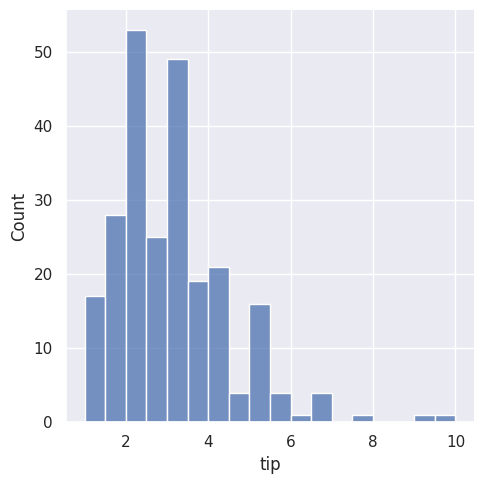

In [6]:
# Distribuzione delle mance
sns.displot(data=df, x='tip')

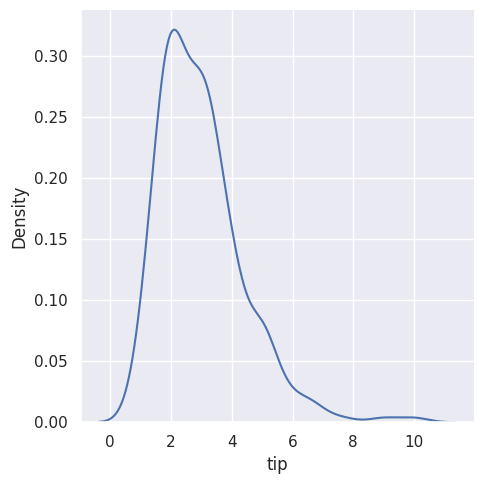

In [9]:
# Distribuzione della densità dei valori
sns.displot(data=df, x='tip', kind='kde')

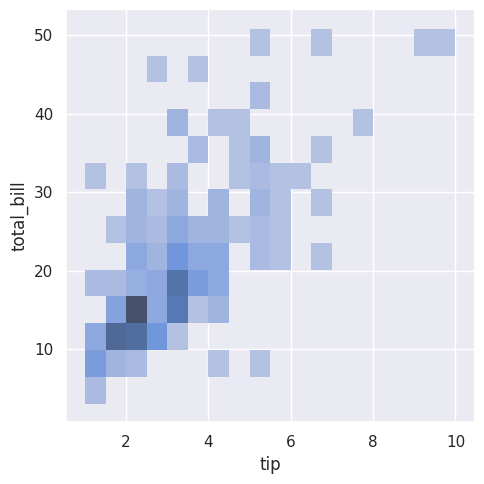

In [10]:
# Distribuzione delle mance rispetto al totale speso
sns.displot(data=df, x='tip', y='total_bill')

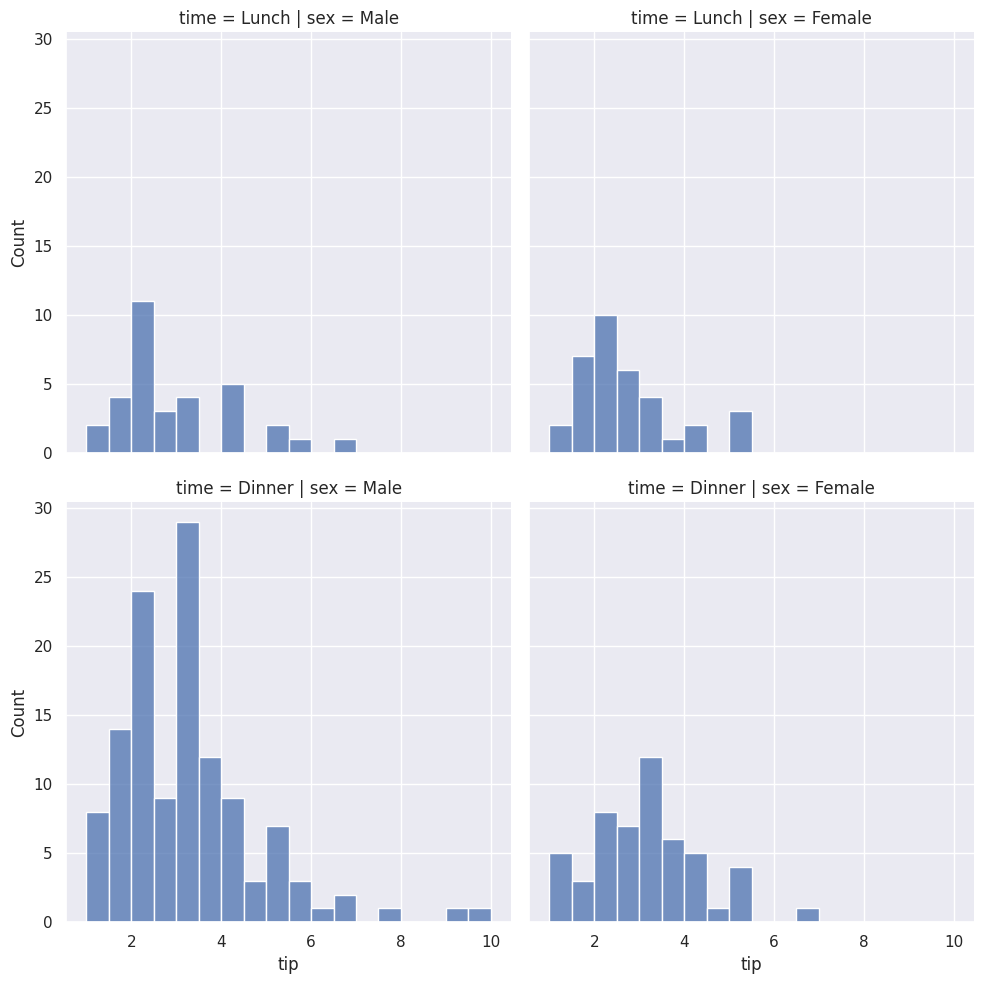

In [17]:
#Distribuzione della mance per sesso del cliente e momento dell’evento
sns.displot(data=df, x='tip', col='sex', row='time')

## Analisi di relazioni tra dati
Il metodo `sns.relplot(data=None, x=None, y=None, hue=None, size=None, style=None, col=None, row=None, kind='scatter')` consente di visualizzare che relazione esiste tra due o più colonne che contengono dati continui. I parametri di input completi possono essere trovati nel manuale https://seaborn.pydata.org/generated/seaborn.relplot.html, qui vengono riportati quelli più importanti che sono:
*	data: dataframe da cui prelevare i dati;
*	x: colonna da posizionare sull’asse x;
*	y: colonna da posizionare sull’asse y;
*	hue: colonna per cui colorare i dati;
*	kind: di default è impostato a scatter e genera uno scatter plot, impostandolo a line crea un line chart che mostra la distribuzione dei dati. Nella modalità line, i dati sull’asse y sono ordinati per x, poi per ogni valore di x se ci sono più  valori di y,  viene calcolata la media di y. La linea rappresenta quindi il valore medio. Sullo sfondo viene mostrato l’intervallo di confidenza al 95% che rappresenta quanto è affidabile quella media;
*	size: colonna da usare nello scatter plot per modificare la dimensione dei punti sulla base del valore (più è grande più è grande il punto);
*	style: colonna da usare nello scatter plot per modificare il tipo di elemento grafico usato per i punti;
*	row: colonna da usare per generare diversi grafici per riga per ogni valore o combinazione di valore;
*	col: colonna da usare per generare diversi grafici per colonna per ogni valore o combinazione di valore.


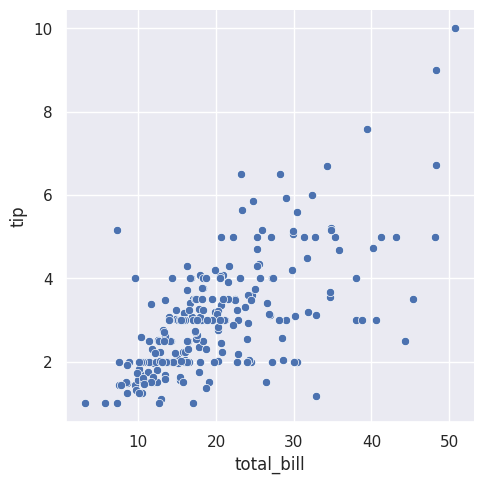

In [21]:
# Distribuzione delle mance rispetto alla spesa totale
sns.relplot(data=df, x='total_bill', y='tip')

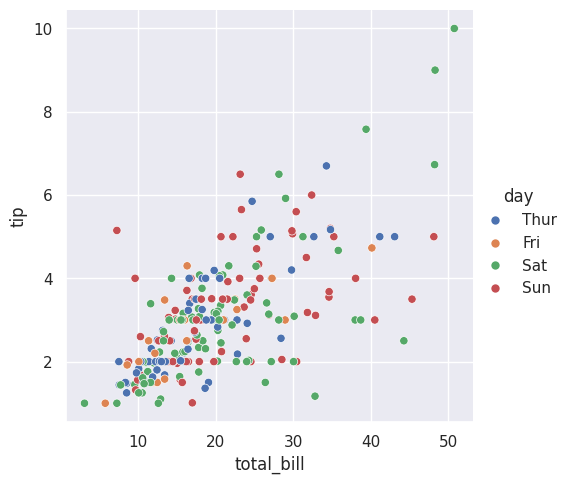

In [22]:
# Distribuzione delle mance rispetto alla spesa totale colorate per giorno della settimana
sns.relplot(data=df, x='total_bill', y='tip', hue='day')

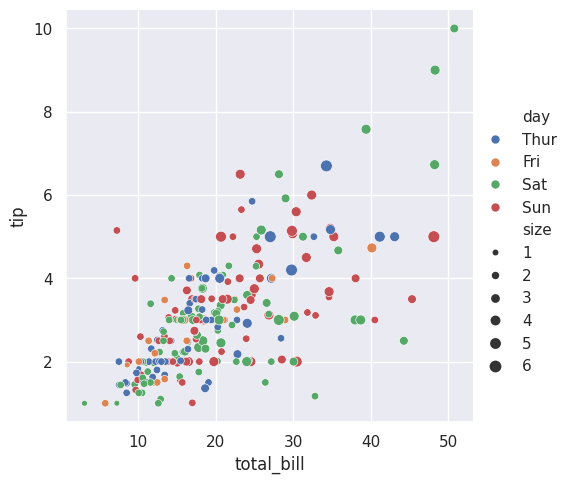

In [25]:
# Distribuzione delle mance rispetto alla spesa totale colorate per giorno della
# settimana, dimensionate sulla base della dimensione della festa
sns.relplot(data=df, x='total_bill', y='tip', hue='day', size='size')

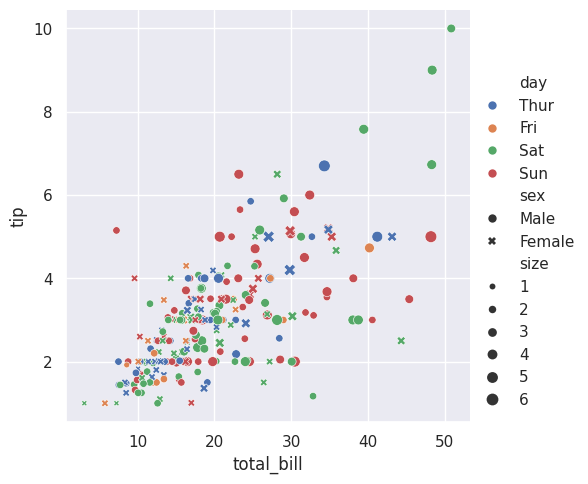

In [26]:
# Distribuzione delle mance rispetto alla spesa totale colorate per giorno della
# settimana, dimensionate sulla base della dimensione della festa, con un
# simbolo diverso sulla base del sesso del cliente
sns.relplot(data=df, x='total_bill', y='tip', hue='day', size='size', style='sex')

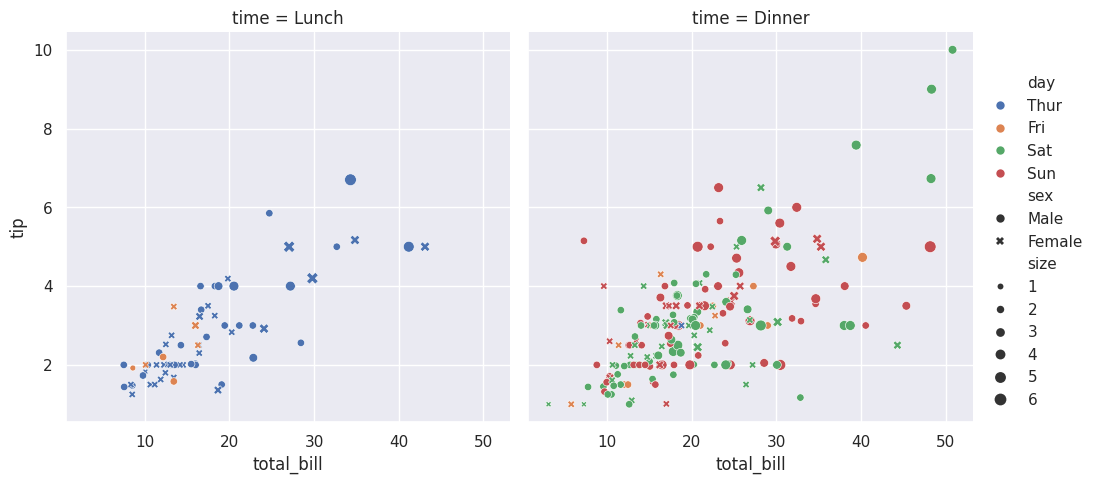

In [28]:
# Possiamo usare il parametro col per creare grafici diversi per colonna sulla
# base di un altro campo, ad esempio differenziare tra pranzo e cena
sns.relplot(data=df, x='total_bill', y='tip', hue='day', size='size', style='sex', col='time')

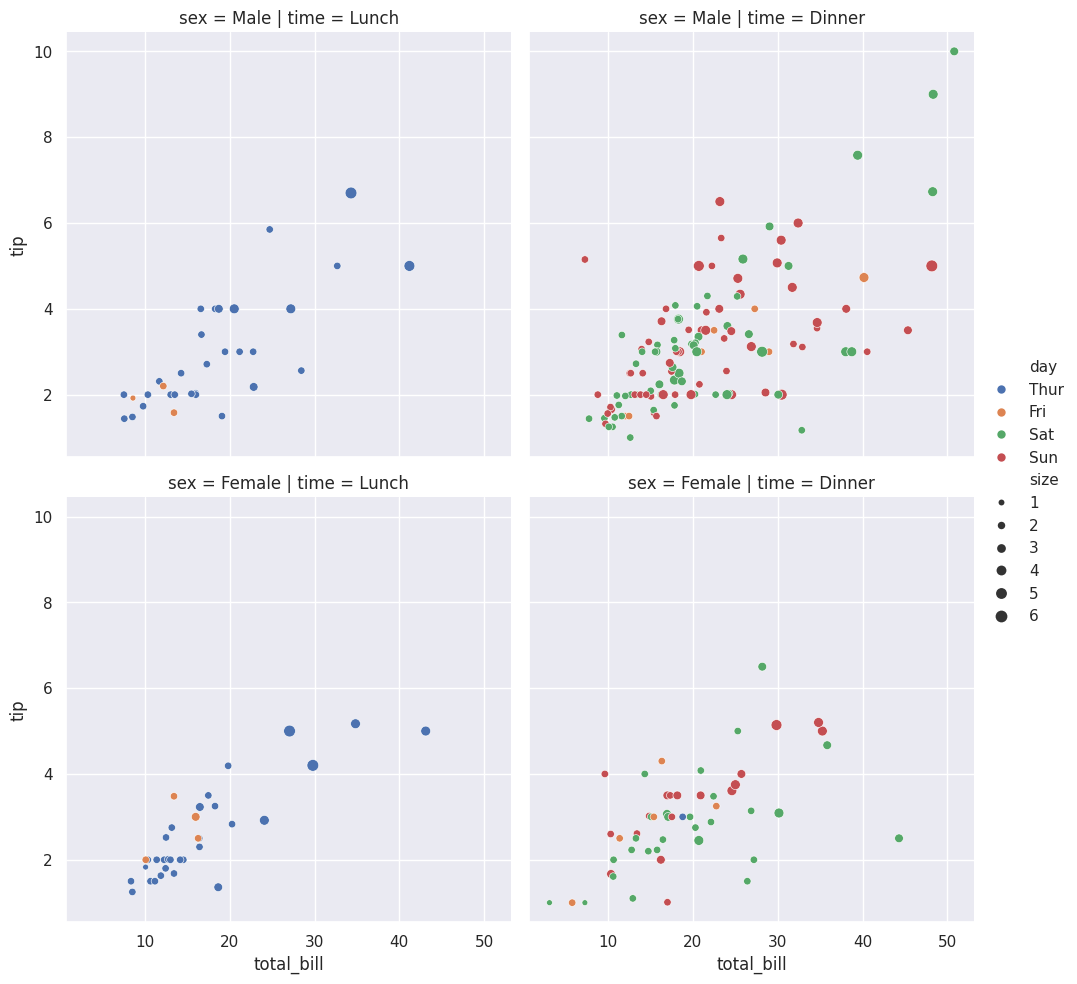

In [29]:
# Con il parametro row possiamo differenziare ancora i dati, per esempio tra
# clienti maschi e femmine
sns.relplot(data=df, x='total_bill', y='tip', hue='day', size='size', col='time', row='sex')

Essendo size un dato ordinale la seguente visualizzazione non è ottimale, comunque impostando kind='line' è possibile vedere come sono distribuiti i dati. Essendoci più mance per la stessa size viene mostrata la media con l’intervallo di confidenza.,

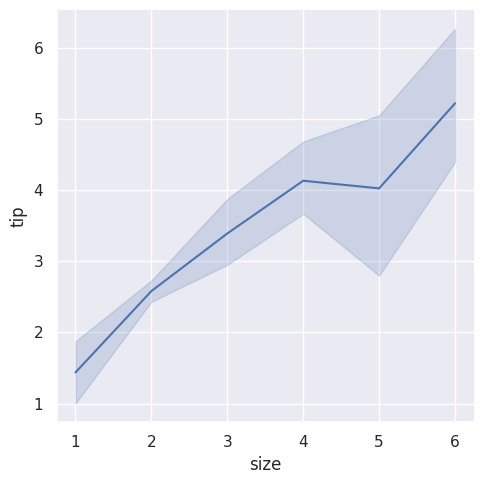

In [30]:
sns.relplot(data=df, x='size', y='tip', kind='line')

## Analisi di dati categorici
La visualizzazione di dati categorici può essere fatta con il metodo `sns.catplot(data=None, x=None, y=None, hue=None, col=None, row=None, kind='strip')` consente di visualizzare la distribuzione di valori categorici. I parametri di input completi possono essere trovati nel manuale https://seaborn.pydata.org/generated/seaborn.catplot.html, qui vengono riportati quelli più importanti che sono:
*	data: dataframe da cui prelevare i dati;
*	x: colonna da posizionare sull’asse x;
*	y: colonna da posizionare sull’asse y;
*	hue: colonna per cui colorare i dati;
*	kind: tipologia di grafico. Abbiamo:
  *	strip: mostra i valori di y come punti rispetto al valore di x.
  *	swarm: mostra i valori di y come punti rispetto al valore di x ottimizzandone la posizione in modo che non si sovrappongano.
  *	box: crea un boxplot dei valori di y per ogni valore di x.
  *	violin: crea un violin plot dei valori di y per ogni valore di x. Il violin plot mostra la distribuzione di probabilità dei valori.
  *	boxen: è una variante del boxplot che mostra meglio la distribuzione dei dati soprattutto quando ci sono molti outliers. Questa tipologia di grafico inizia posizionando al centro la mediana  come linea centrale, poi Ogni livello successivo verso l'esterno contiene la metà dei dati rimanenti. Quindi le prime due sezioni a partire dalla linea centrale contengono il 50% dei dati. Successivamente, le due sezioni successive contengono il 25% dei dati. Questo continua fino a raggiungere il livello dei valori anomali (outliers). Ogni livello verso l'esterno è ombreggiato in modo più chiaro. Esistono 4 metodi per calcolare i valori anomali (disponibili in seaborn). L'impostazione predefinita è di ottenere circa 5-8 valori anomali in ciascuna coda.
  *	bar: mostra il valore medio di y per ogni valore di x come un barchart. Per ogni barra viene mostrata la deviazione standard come una linea.
  *	count: conta il numero di occorrenze di x. Non bisogna inserire un valore di y.
*	row: colonna da usare per generare diversi grafici per riga per ogni valore o combinazione di valore;
*	col: colonna da usare per generare diversi grafici per colonna per ogni valore o combinazione di valore.


Iniziamo dalle varie visualizzazioni disponibili, ad esempio mostriamo le mance per giorno della settimana.

In questo modo possiamo contare il numero di osservazioni per giorno della settimana

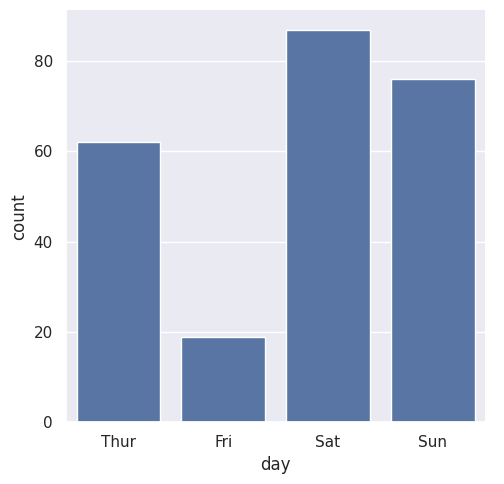

In [31]:
sns.catplot(data=df, x='day', kind='count')

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


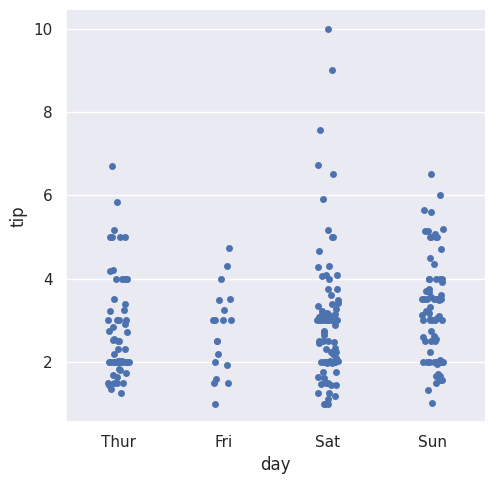

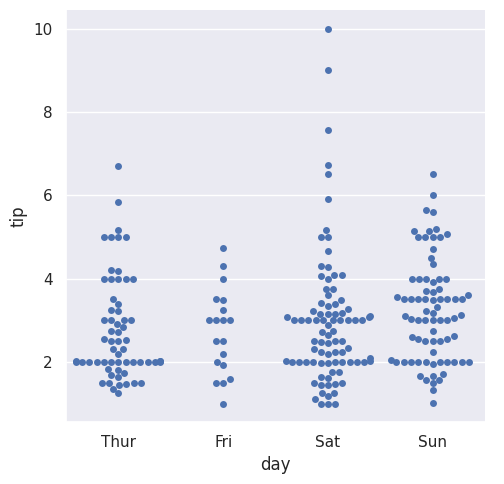

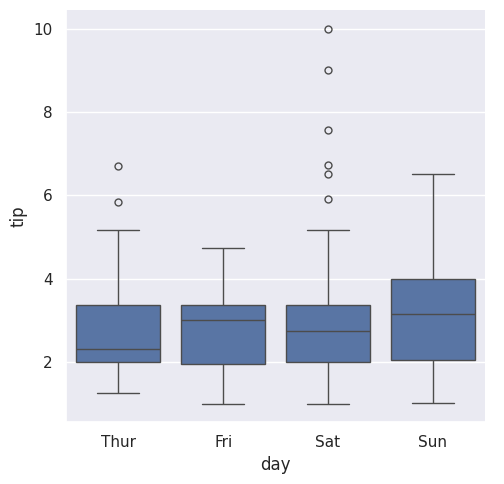

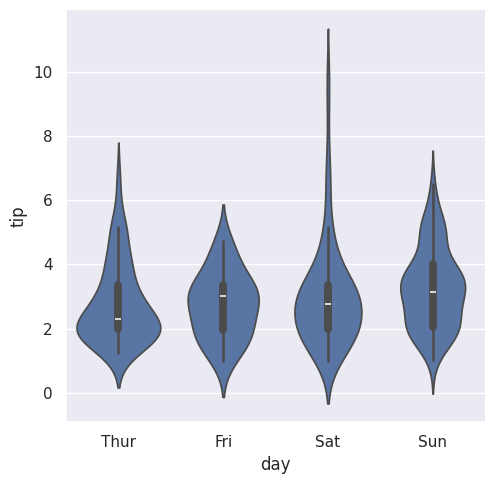

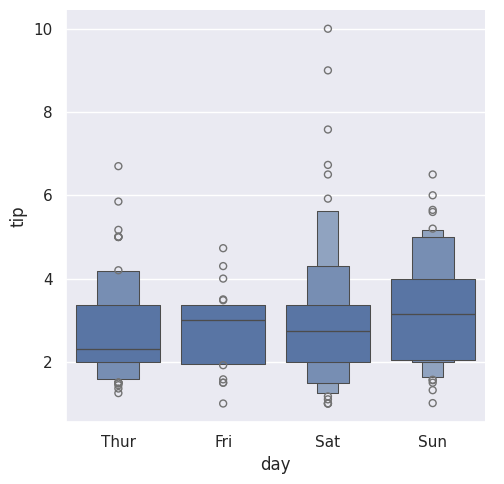

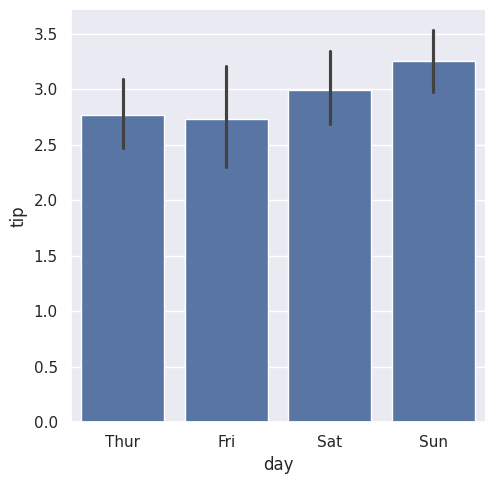

In [44]:
for k in ['strip', 'swarm', 'box', 'violin', 'boxen', 'bar']:
  display(sns.catplot(data=df, x='day', y='tip', kind=k))

Aggiungendo hue possiamo visualizzare i dati per una terza dimensione. Il comportamento varia a seconda della tipologia di grafico scelta.

Ad esempio, in uno swarm chart i punti verranno colorati sulla base di questa dimensione, mentre in un bar chart verrà generata una barra per ognuno dei valori.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


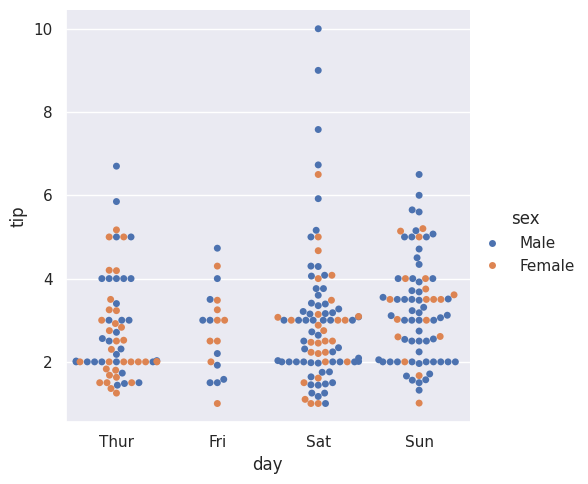

In [45]:
sns.catplot(data=df, x='day', y='tip', kind='swarm', hue='sex')

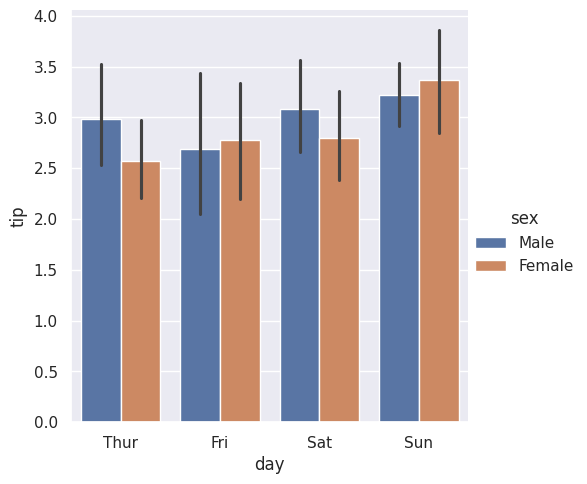

In [46]:
sns.catplot(data=df, x='day', y='tip', kind='bar', hue='sex')